In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data[:,[2,3]]
y = iris.target
print("Class labels:",np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [4]:
print('Label counts in y:',np.bincount(y))
print('Label counts in y_train:',np.bincount(y_train))
print('Label counts in y_tEST:',np.bincount(y_test))

Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_tEST: [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)


Perceptron(eta0=0.1, random_state=1)

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test!=y_pred).sum())

Misclassified examples: 1


In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.978


In [9]:
print('Accuracy: %.3f' % ppn.score(X_test_std,y_test))

Accuracy: 0.978


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    """

    :param X:
    :param y:
    :param classifier:
    :param test_idx:
    :param resolution:
    :return:
    """
    # set up marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
                    alpha=0.8,c=colors[idx],
                    marker=markers[idx],label=cl,
                    edgecolors='black')
        # highlight test examples
        if test_idx:
            X_test,y_test = X[test_idx,:],y[test_idx]

            plt.scatter(X_test[:,0],X_test[:,1],
                        c='', edgecolors='black',alpha=1.0,
                        linewidths=1,marker = 'o',
                        s=100,label='test set')


<ipython-input-10-95e78bf84d42>:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:,0],X_test[:,1],


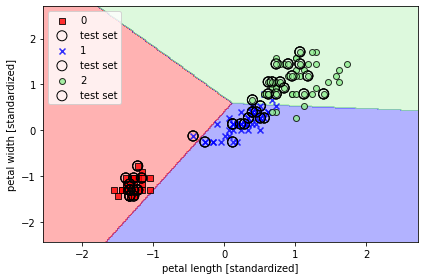

In [11]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combinded = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combinded,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Logistic regression and conditional probabilities

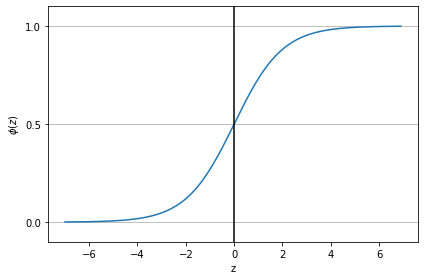

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    """

    :param z:
    :return:
    """
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0,0.5,1.0])
ax =plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

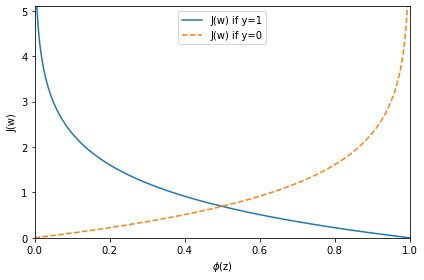

In [14]:

def cost_1(z):
    return-np.log(sigmoid(z))
def cost_o(z):
    return-np.log(1-sigmoid(z))

z = np.arange(-10,10,0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z,c1,label='J(w) if y=1')
c0 = [cost_o(x) for x in z]
plt.plot(phi_z,c0,linestyle='--',label='J(w) if y=0')
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [18]:
class LogisticRegressionGD(object):
    def __init__(self,eta=0.05,n_iter=100,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01,
                              size=1+X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y -output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()

            cost = (-y.dot(np.log(output))-
                    ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+ self.w_[0]
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z,-250,250)))
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,0)


<ipython-input-18-8e889f989294>:19: RuntimeWarning: divide by zero encountered in log
  ((1-y).dot(np.log(1-output))))


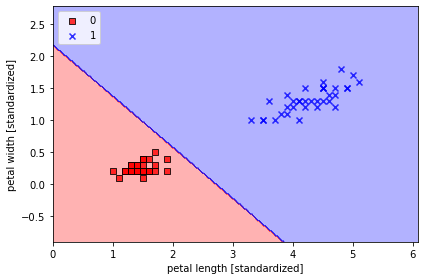

In [20]:
X_train_01_subset = X_train[(y_train ==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train ==0)|(y_train==1)]
lrgd = LogisticRegressionGD(eta=0.5,n_iter=1000,random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-10-95e78bf84d42>:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:,0],X_test[:,1],


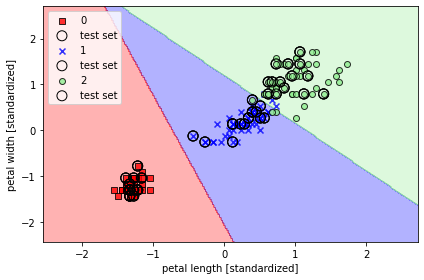

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,
                        random_state=1,
                        solver='lbfgs',
                        multi_class='ovr')
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,
                      y_combinded,
                      classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
lr.predict_proba(X_test_std[:3:1])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [25]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [26]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [27]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])